In [1]:
import random
import numpy as np

def calculate_reduce_frame(video_frame, target_frame):
    # Tạo ma trận hệ số
    coefficients = np.array([[2, 1], [1, 1]])

    # Tạo vector kết quả
    constants = np.array([video_frame, target_frame])

    # Giải hệ phương trình
    solution = np.linalg.solve(coefficients, constants)
    return solution[0], solution[1]

def calculate_extra_frame(video_frame, target_frame):
    # Tạo ma trận hệ số
    coefficients = np.array([[1, 1], [2, 1]])

    # Tạo vector kết quả
    constants = np.array([video_frame, target_frame])

    # Giải hệ phương trình
    solution = np.linalg.solve(coefficients, constants)
    return solution[0], solution[1]

def get_frame_list(video_frame, target_frame):
    if video_frame > target_frame:
        new_lst = []
        a, b = calculate_reduce_frame(video_frame, target_frame)
        for i in range(int(a)):
            new_lst.append(2 * i)
        for i in range(int(2 * a), int(2 * a + b)):
            new_lst.append(i)

        # print(new_lst)

    elif video_frame < target_frame:
        new_lst = []
        a, b = calculate_extra_frame(video_frame, target_frame)
        # print(a, b)
        for i in range(int(a)):
            new_lst.append(i)
            new_lst.append(i)
        for i in range(int(a), int(a + b)):
            new_lst.append(i)
        
        # print(new_lst)

    else:
        new_lst = lst
    return new_lst

import cv2

# Hàm mới để xử lý video
def process_video(video_path, output_path, target_frame):
    # Mở video
    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        print("Không thể mở video")
        return

    # Đọc số lượng frames và tính toán danh sách frame
    video_frame = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    frame_list = get_frame_list(video_frame, target_frame)

    # Tạo đối tượng VideoWriter để ghi video
    fourcc = cv2.VideoWriter_fourcc(*'XVID')
    fps = cap.get(cv2.CAP_PROP_FPS)
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

    # Xử lý từng frame
    frame_idx = 0
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        # Kiểm tra và xử lý frame
        if frame_idx in frame_list :
            if frame_list.count(frame_idx) > 1:
                out.write(frame)
                out.write(frame)
            else:
                out.write(frame)
        frame_idx += 1

    # Đóng tất cả
    cap.release()
    out.release()
    cv2.destroyAllWindows()

In [2]:
import os
from tqdm import tqdm

def process_all_videos(source_folder, target_folder, target_frame):
    # Tạo thư mục đích nếu chưa tồn tại
    if not os.path.exists(target_folder):
        os.makedirs(target_folder)

    # Lấy danh sách tất cả các file video
    video_files = [file for file in os.listdir(source_folder) if file.endswith('.mp4')]

    for video_file in tqdm(video_files):
        video_path = os.path.join(source_folder, video_file)
        output_path = os.path.join(target_folder, video_file)
        process_video(video_path, output_path, target_frame)

source_folder = 'augmented_data'
target_folder = 'reframe_video'
target_frame = 120

process_all_videos(source_folder, target_folder, target_frame)

 16%|█▌        | 475/3000 [05:36<27:21,  1.54it/s]

Không thể mở video
Không thể mở video


 16%|█▌        | 478/3000 [05:36<14:16,  2.94it/s]

Không thể mở video
Không thể mở video


 16%|█▌        | 480/3000 [05:37<10:28,  4.01it/s]

Không thể mở video
Không thể mở video


 65%|██████▌   | 1952/3000 [24:17<08:46,  1.99it/s]

Không thể mở video
Không thể mở video


 65%|██████▌   | 1954/3000 [24:17<05:47,  3.01it/s]

Không thể mở video
Không thể mở video


 65%|██████▌   | 1956/3000 [24:17<04:20,  4.01it/s]

Không thể mở video
Không thể mở video


 70%|███████   | 2102/3000 [26:00<06:33,  2.28it/s]

Không thể mở video
Không thể mở video


 70%|███████   | 2104/3000 [26:00<04:30,  3.31it/s]

Không thể mở video
Không thể mở video


 70%|███████   | 2106/3000 [26:00<03:24,  4.36it/s]

Không thể mở video
Không thể mở video


100%|██████████| 3000/3000 [37:23<00:00,  1.34it/s]


In [3]:
import cv2

def get_video_info(video_path):
    # Mở video
    cap = cv2.VideoCapture(video_path)

    # Kiểm tra xem video có được mở thành công hay không
    if not cap.isOpened():
        print("Không thể mở video.")
        return

    # Lấy số tổng số frame
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

    # Lấy số frame rate
    frame_rate = cap.get(cv2.CAP_PROP_FPS)

    print(f"Tổng số frame của video là: {total_frames}")
    print(f"Số frame rate của video là: {frame_rate} frames per second")

    # Đóng video
    cap.release()

# Thay đổi đường dẫn của video của bạn
video_path = r'reframe_data\017_001_004_cropped_rotated_right.mp4'
get_video_info(video_path)


Không thể mở video.


Đang xử lý video: 100%|██████████| 2982/2982 [00:13<00:00, 226.54it/s]


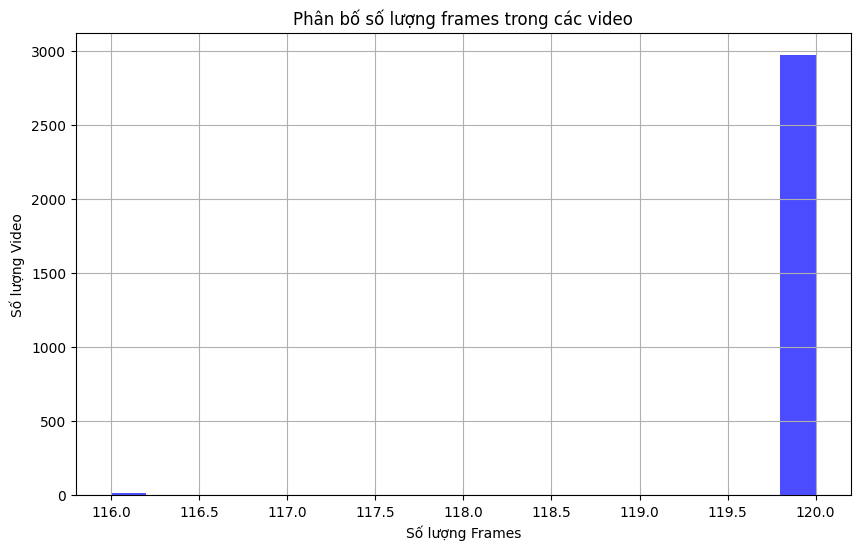

Số lượng frames trung bình của mỗi video: 119.98390342052313


In [4]:
import cv2
import os
import matplotlib.pyplot as plt
from tqdm import tqdm

# Đường dẫn đến thư mục chứa video
folder_path = 'reframe_video'

# Lấy danh sách tất cả các file video trong thư mục
video_files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]

frame_counts = []
video_count = 0
lst = []
# Duyệt qua tất cả các video và đếm số lượng frames
for video_file in tqdm(video_files, desc="Đang xử lý video"):
    path = os.path.join(folder_path, video_file)
    cap = cv2.VideoCapture(path)

    if not cap.isOpened():
        print(f"Không thể mở video {video_file}")
        continue

    frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    if frame_count < 100:
        # print(video_file)
        lst.append(video_file)

    frame_counts.append(frame_count)
    video_count += 1

    cap.release()

# Vẽ biểu đồ thống kê số lượng frames
plt.figure(figsize=(10, 6))
plt.hist(frame_counts, bins=20, color='blue', alpha=0.7)
plt.title('Phân bố số lượng frames trong các video')
plt.xlabel('Số lượng Frames')
plt.ylabel('Số lượng Video')
plt.grid(True)
plt.show()

# In ra thông tin thống kê
if video_count > 0:
    average_frames = sum(frame_counts) / video_count
    print(f"Số lượng frames trung bình của mỗi video: {average_frames}")
else:
    print("Không tìm thấy video trong thư mục.")


In [20]:
len(lst)

462